During the last few days we have seen how to collect data from :
* RESTful API based websites (get the link -> get the json)
* Statis websites (get the link -> get the soup -> select the data)

But there is 1 more type of web scraping. It involves the usage of API Wrappers.

# API Wrappers

In [1]:
!pip3 install quandl

In [1]:
import quandl
import getpass
quandl.ApiConfig.api_key=getpass.getpass()

········


In [4]:
import pandas as pd

In [5]:
companies=pd.read_csv('https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/data/module-1/companies.csv')

In [5]:
companies

,Ticker,Company
0,AAPL,Apple Inc.
1,NFLX,"Netflix, Inc."
2,AMZN,"Amazon.com, Inc."
3,MSFT,Microsoft Corporation
4,GOOG,Alphabet Inc.
5,TSLA,"Tesla Motors, Inc."
6,FB,"Facebook, Inc."
7,AAP,Advance Auto Parts Inc.
8,DIS,The Walt Disney Company
9,NKE,"NIKE, Inc."


In [15]:
quandl.get('WIKI/AAPL')

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.750,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.250,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.250,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.870,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.630,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.040000,175.090000,171.260000,171.270000,35247358.0
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.000000,172.680000,168.600000,168.845000,41051076.0
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.390000,169.920000,164.940000,164.940000,40248954.0


In [9]:
ticker_list=companies.Ticker.to_list()

In [10]:
def get_prices(ticker: str) -> pd.DataFrame:
    print('retrieving data for', ticker)
    prices=quandl.get(f'WIKI/{ticker}')['Adj. Close'].reset_index()
    prices['Ticker']=ticker
    return prices

In [14]:
get_prices('MSFT')

retrieving data for MSFT


,Date,Adj. Close,Ticker
0,1986-03-13,0.064720,MSFT
1,1986-03-14,0.067031,MSFT
2,1986-03-17,0.068187,MSFT
3,1986-03-18,0.066454,MSFT
4,1986-03-19,0.065298,MSFT
...,...,...,...
8071,2018-03-21,92.480000,MSFT
8072,2018-03-22,89.790000,MSFT
8073,2018-03-23,87.180000,MSFT
8074,2018-03-26,93.780000,MSFT


In [16]:
lodf=list(map(get_prices, ticker_list))

retrieving data for AAPL
retrieving data for NFLX
retrieving data for AMZN
retrieving data for MSFT
retrieving data for GOOG
retrieving data for TSLA
retrieving data for FB
retrieving data for AAP
retrieving data for DIS
retrieving data for NKE
retrieving data for UA
retrieving data for BAC
retrieving data for CCL
retrieving data for CI
retrieving data for AAL
retrieving data for LUV
retrieving data for WFC
retrieving data for WMT
retrieving data for HD
retrieving data for ORCL
retrieving data for IBM
retrieving data for NCLH
retrieving data for RCL
retrieving data for TWX
retrieving data for FOX
retrieving data for F
retrieving data for GCI
retrieving data for XOM
retrieving data for WWE
retrieving data for WM


In [21]:
data=pd.concat(lodf)

In [22]:
data

,Date,Adj. Close,Ticker
0,1980-12-12,0.422706,AAPL
1,1980-12-15,0.400652,AAPL
2,1980-12-16,0.371246,AAPL
3,1980-12-17,0.380362,AAPL
4,1980-12-18,0.391536,AAPL
...,...,...,...
6668,2018-03-21,85.920000,WM
6669,2018-03-22,84.240000,WM
6670,2018-03-23,82.900000,WM
6671,2018-03-26,84.130000,WM


In [24]:
dfpvt=data.pivot_table(index='Date', columns='Ticker', values='Adj. Close')

In [26]:
dfpvt.diff()

Ticker,AAL,AAP,AAPL,AMZN,BAC,CCL,CI,DIS,F,FB,...,ORCL,RCL,TSLA,TWX,UA,WFC,WM,WMT,WWE,XOM
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001896,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000493,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000493,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,-1.23,0.99,-3.970,-4.65,-0.11,-0.79,2.05,0.470000,0.11,1.24,...,-0.03,-1.49,5.98,0.11,0.06,-0.11,-0.35,0.23,-0.19,1.05
2018-03-22,-1.78,-3.53,-2.425,-37.76,-1.32,-0.86,-1.71,-1.220000,-0.35,-4.50,...,-1.13,-3.19,-7.43,-1.03,-0.36,-2.26,-1.68,-1.04,-0.40,-1.54
2018-03-23,-1.30,-0.87,-3.905,-48.54,-1.38,-1.79,-1.34,-2.060000,-0.19,-5.50,...,-1.10,-3.14,-7.56,-1.69,0.01,-1.55,-1.34,-1.72,-0.08,-0.61


In [27]:
dfpvt.tail()

Ticker,AAL,AAP,AAPL,AMZN,BAC,CCL,CI,DIS,F,FB,...,ORCL,RCL,TSLA,TWX,UA,WFC,WM,WMT,WWE,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-21,54.09,115.24,171.270,1581.86,31.87,67.06,167.05,101.82,11.10,169.39,...,47.02,123.37,316.53,95.29,14.07,54.79,85.92,88.18,36.30,75.04
2018-03-22,52.31,111.71,168.845,1544.10,30.55,66.20,165.34,100.60,10.75,164.89,...,45.89,120.18,309.10,94.26,13.71,52.53,84.24,87.14,35.90,73.50
2018-03-23,51.01,110.84,164.940,1495.56,29.17,64.41,164.00,98.54,10.56,159.39,...,44.79,117.04,301.54,92.57,13.72,50.98,82.90,85.42,35.82,72.89
2018-03-26,51.86,114.77,172.770,1555.86,30.44,65.80,168.68,100.65,10.83,160.06,...,46.48,119.92,304.18,93.99,14.46,52.29,84.13,87.50,36.90,74.00
2018-03-27,50.90,115.01,168.340,1497.05,29.52,65.73,165.54,99.36,10.83,152.19,...,45.38,118.30,279.18,94.20,14.32,51.10,83.29,86.05,36.18,73.70


<AxesSubplot:xlabel='Date'>

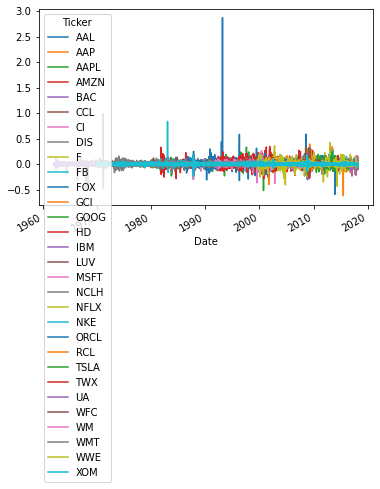

In [31]:
dfpvt.pct_change().plot()

# Error Handling

1. Bad getaway
2. Too many redirects
3. Timeout Error
4. SSL Error
5. OS Error
6. Rate Limitations

In [2]:
import requests as r
url='https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/documents/the-html5-breakfast-site.html'
r.get(url)

<Response [200]>

In [3]:
url='https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/documents/forbidden'
r.get(url)

<Response [403]>

In [5]:
url='http://google.com'
response=r.get(url)
response

<Response [200]>

In [6]:
response.history

[<Response [301]>]

In [7]:
url='http://fb.com'
response=r.get(url)
response

<Response [200]>

In [12]:
response.headers

{'X-Frame-Options': 'DENY', 'X-XSS-Protection': '0', 'X-Content-Type-Options': 'nosniff', 'Strict-Transport-Security': 'max-age=15552000; preload', 'Set-Cookie': 'fr=1sbH85CBtWoe9AL20..BgLpP3.q5.AAA.0.0.BgLpP3.AWWX8pNbPwY; expires=Wed, 19-May-2021 16:21:10 GMT; Max-Age=7775999; path=/; domain=.facebook.com; secure; httponly, sb=95MuYDYEp_dWolzipRL0luR-; expires=Sat, 18-Feb-2023 16:21:11 GMT; Max-Age=63072000; path=/; domain=.facebook.com; secure; httponly', 'Content-Encoding': 'gzip', 'Expires': 'Sat, 01 Jan 2000 00:00:00 GMT', 'Cache-Control': 'private, no-cache, no-store, must-revalidate', 'Vary': 'Accept-Encoding', 'Pragma': 'no-cache', 'x-fb-rlafr': '0', 'Content-Type': 'text/html; charset="utf-8"', 'X-FB-Debug': 'N+FiHzMw63QLBV1a3ioOWpftmVWhrcmfOJmU2tYB5SX8ZiV0WVveVIIyjIWBDyk5xx8oCdrmpmZsn0kuaUPXOA==', 'Date': 'Thu, 18 Feb 2021 16:21:11 GMT', 'Alt-Svc': 'h3-29=":443"; ma=3600,h3-27=":443"; ma=3600', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive'}

In [17]:
response.history[1].content

b''

In [18]:
def func(url, headers={}):
    resp=r.get(url, headers=headers)
    if resp:
        return resp.content
    else:
        print('Sorry, there is an error')
        print('Status code is',resp.status_code)
        return None

In [20]:
func('https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/documents/forbidden')

Sorry, there is an error
Status code is 403


In [21]:
url='https://www.geographics.cz/'

In [25]:
from requests.exceptions import SSLError, Timeout, TooManyRedirects, RequestException


In [28]:
try:
    r.get(url)
except SSLError:
    print('SSL Error. Deactivating the test!')
    print(r.get(url, verify=False))

SSL Error. Deactivating the test!
<Response [200]>


C:\Users\eldiy\Anaconda3\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.geographics.cz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


In [29]:
timeout=0.05

In [31]:
try:
    r.get(url, verify=False, timeout=timeout)
except Timeout:
    print('Timeout Error')
    print(r.get(url, verify=False))

C:\Users\eldiy\Anaconda3\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.geographics.cz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\eldiy\Anaconda3\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.geographics.cz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


Timeout Error
<Response [200]>


In [32]:
try:
    r.get(url, verify=False)
except TooManyRedirects:
    print('TooManyRedirects Error')
    print(r.get(url, verify=False, allow_redirects=True))

C:\Users\eldiy\Anaconda3\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.geographics.cz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


In [35]:
print('Hello')
import time
time.sleep(1)
print('...')
time.sleep(1)
print('...')
time.sleep(1)
print('...')
print('world')

Hello
...
...
...
world


In [36]:
from requests.exceptions import SSLError, Timeout, TooManyRedirects, RequestException
from contextlib import closing
from IPython.display import Markdown, display
import warnings

warnings.filterwarnings('ignore')


timeout_glob=0.05
verify_glob=True
allow_glob=False

def printmd(string):
    display(Markdown('**'+string+'**'))
    
def is_good_response(x):
    """
    Returns True if the response seems to be an HTML, False otherwise
    x is response
    """
    
    content_type=x.headers['Content-Type'].lower()
    
    return ((x.status_code==200 and content_type is not None and content_type.find('html')>1), x.status_code)

def log_error(e):
    print(e)
    
    
def status_handler(status):
    if status<300:
        print('Alles gut!')
    elif status>=400 and status<500:
        print('request has failed due to you mistake bro. Check the link, headers, server and whether you have an access to this page.')
    else:
        print('Yoooo, I have no clue what has happened. But you are stuck, since you didnt receive any output from server')
    return None


def adaptive_scraping(url, timeout=timeout_glob, verify=verify_glob):
    global timeout_glob
    global verify_glob
    global allow_glob
    import requests as r
    
    try:
        with closing(r.get(url, stream=True, timeout=timeout_glob, verify=verify_glob, allow_redirects=allow_glob)) as resp:
            test1=is_good_response(resp)
            print(resp)
            if test1[0]:
                return resp.content
            else:
                return status_handler(test1[1])
    except Timeout as e:
        log_error(f'Error during request to {url}: {str(e)}')
        printmd('We can increase response waiting time. Do you want to continue?')
        ans=input('\n[Yes|No]\t')
        if ans.lower()=='yes':
            timeout_glob*=2
            return adaptive_scraping(url)
        else:
            return None
    except SSLError as e:
        log_error(f'Error during request to {url}: {str(e)}')
        printmd('We can skip verification test. Do you want to continue?')
        ans=input('\n[Yes|No]\t')
        if ans.lower()=='yes':
            verify_glob=False
            return adaptive_scraping(url)
        else:
            return None
    except TooManyRedirects as e:
        log_error(f'Error during request to {url}: {str(e)}')
        printmd('We can increase the number of allowed redirects. Do you want to continue?')
        ans=input('\n[Yes|No]\t')
        if ans.lower()=='yes':
            allow_glob=True
            return adaptive_scraping(url)
        else:
            return None
    except RequestException as e:
        log_error(f'Error during request to {url}: {str(e)}')
        printmd('Unfortunately, we have no clue what to do.  Please try again later. ')
        return None
        

In [37]:
adaptive_scraping(url)

Error during request to https://www.geographics.cz/: HTTPSConnectionPool(host='www.geographics.cz', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError("hostname 'www.geographics.cz' doesn't match either of '*.ebola.cz', 'ebola.cz'")))


**We can skip verification test. Do you want to continue?**


[Yes|No]	yes
Error during request to https://www.geographics.cz/: HTTPSConnectionPool(host='www.geographics.cz', port=443): Read timed out. (read timeout=0.05)


**We can increase response waiting time. Do you want to continue?**


[Yes|No]	yes
Error during request to https://www.geographics.cz/: HTTPSConnectionPool(host='www.geographics.cz', port=443): Read timed out. (read timeout=0.1)


**We can increase response waiting time. Do you want to continue?**


[Yes|No]	yes
<Response [200]>


b'<!DOCTYPE html>\n<html lang="en-US">\n\n<head>\n\t<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\n\t<title>Geographics.cz </title>\n\t<meta name="viewport" content="width=device-width, initial-scale = 1.0, maximum-scale=1.0, user-scalable=no" />\n\t\n\t<link rel="stylesheet" type="text/css" href="wp-content/themes/custom/css/fonts.css" />\n\t<link rel="stylesheet" type="text/css" href="wp-content/themes/custom/css/custom.css" />\n\n\t<link rel="stylesheet" type="text/css" href="http://fonts.googleapis.com/css?family=Droid+Sans:regular,bold" />\n\t<link rel="stylesheet" type="text/css" href="http://fonts.googleapis.com/css?family=Droid+Serif:regular,bold" />\n\t<link href=\'http://fonts.googleapis.com/css?family=Source+Sans+Pro\' rel=\'stylesheet\' type=\'text/css\'>\n\n\t\t\t\t\t\t\n\t\t\n\t\t\t\n\t<link rel="stylesheet" href="https://www.geographics.cz/wp-content/themes/herothemetrust-child/style.css" type="text/css" media="screen" />\n\t<link rel="alternate" 

In [39]:
lol=['https://google.com','https://google.com/page=2']

In [40]:
def scrape_page(url):
    pass

In [ ]:
number_of_iteration=0
for i in lol:
    number_of_iteration+=1
    df=scrape_page(url)
    dffinal=dffinal.append(df)
    if number_of_iteration%10 and number_of_iteration:
        time.sleep(5)